# Install

In [1]:
#!pip install matplotlib
#!pip install wordcloud
#!pip install scattertext
#!pip install textblob
#!pip install networkx
#!pip install texthero -U
#!pip install pyLDAvis

# Import

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

import pyLDAvis.gensim as gensimvis
import gensim
import pyLDAvis
from gensim.models import LdaModel
from gensim.corpora import Dictionary

from sklearn.cluster import AgglomerativeClustering
from nltk.sentiment import SentimentIntensityAnalyzer

from gensim.models import Word2Vec
import gensim
from gensim import utils

import warnings
warnings. filterwarnings('ignore')

Loading BokehJS ...

In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import collections

import string
import re

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import kde
import networkx as nx

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('vader_lexicon')
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from collections.abc import Iterable

from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hopel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hopel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hopel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
from scipy.spatial.distance import cdist

# Input Data

In [5]:
header = ["target", "id", "date", "flag", "user", "text"]

# Read the CSV file with specified column names
df = pd.read_csv("X_dataset.csv", encoding="ISO-8859-1", names=header)

# selecting target and features
normal = df[["target","text"]]
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


# Preprocessing

In [6]:
def preprocessing(data):
    # Lower case
    data = data.str.lower()
    # Remove Email
    data = data.apply(lambda x: cleaning_email(x))
    # Remove URL
    data = data.apply(lambda x: cleaning_URLs(x))
    # Remove Punctuations
    data = data.apply(lambda text: cleaning_punctuations(text))
    # Remove Number
    data = data.apply(lambda x: cleaning_numbers(x))
    # Remove Stopwords
    data = data.apply(lambda text: cleaning_stopwords(text))
    # Tokenizer
    data = data.apply(tokenizer.tokenize)
    # Lemmatizer
    data = data.apply(lambda x: lemmatizer_on_text(x))
    # Remove Veb
    data = data.apply(Keep_nouns)
    # Recombine Words
    data = data.apply(lambda y: ' '.join(y) if isinstance(y, Iterable) else '')
    return data

# Remove Email
def cleaning_email(df):
    return re.sub('@[^\s]+', ' ', df)

# Remove URL
def cleaning_URLs(df):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',df)

# Remove Punctuations
english_punctuations = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

# Remove Number 
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

# Remove Stopwords
stopwords_list = stopwords.words('english')
STOPWORDS = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Tokenisation
tokenizer = RegexpTokenizer(r'\w+')

# Lemmatizer
def lemmatizer_on_text(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

# Function to Keep nouns using POS tagging
def Keep_nouns(tokenized_words):
    tagged_words = pos_tag(tokenized_words)
    words_without_nouns = [word for word, tag in tagged_words if tag == 'NN']
    return words_without_nouns if words_without_nouns else []

# Sampling
def sampling_data(data):
    sample_size=490
    data = data.sample(n=sample_size, random_state=42)
    data.reset_index(drop=True, inplace=True)
    return data

# TF_IDF
def TFIDF(data):
    TFIDF = TfidfVectorizer()
    data = TFIDF.fit_transform(data)
    return data

# Count Vectorizer
def CV(data):
    small_count_vectorizer = CountVectorizer()
    data = small_count_vectorizer.fit_transform(data)
    return data

# SVD
def SVD_Reduce_Dim(data):
    svd = TruncatedSVD(n_components=2)
    data = svd.fit_transform(data)
    return data

# PCA
def PCA_Reduce_Dim(data):
    pca = PCA(n_components=2)
    data = pca.fit_transform(data.toarray())
    return data

In [7]:
# Split Data
data_Neg = normal[(normal["target"] == 0)]["text"]
data_Pos = normal[(normal["target"] == 4)]["text"]

# Sampling Text data
sampleneg = sampling_data(data_Neg)
samplepos = sampling_data(data_Pos)

sampleneg = preprocessing(sampleneg)
samplepos = preprocessing(samplepos)

# TFIDF Num data
TFIDF_N_reduced = TFIDF(sampleneg)
TFIDF_P_reduced = TFIDF(samplepos)

# CV Num data
CV_N_reduced = CV(sampleneg)
CV_P_reduced = CV(samplepos)

N_reduced = SVD_Reduce_Dim(TFIDF_N_reduced)
P_reduced = SVD_Reduce_Dim(TFIDF_P_reduced)

CV_N_reduced = SVD_Reduce_Dim(CV_N_reduced)
CV_P_reduced = SVD_Reduce_Dim(CV_P_reduced)

In [ ]:
#K-Means, DBSCAN, Agglomerative Hierarchical Clustering
def silhouettescore(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    print(silhouette_avg)
    return silhouette_avg
    

# Visualisation

In [ ]:
def visualization_process(data):
    data = data.str.cat(sep=' ')
    
    res = collections.Counter(data.split())
    res_mostcommon_10 = res.most_common(10)
    res_mostcommon_100 = res.most_common(100)
    
    values, counts = zip(*res_mostcommon_10)
    values2, counts2 = zip(*res_mostcommon_100)
    return values, counts, values2, counts2



In [ ]:
Neg_values, Neg_counts, Neg_values2, Neg_counts2 = visualization_process(data_Neg)
Pos_values, Pos_counts, Pos_values2, Pos_counts2 = visualization_process(data_Pos)

In [ ]:
def Word_Cloud(data, type):
    # Combine the text for the Word Cloud
    wordcloud_text = data.str.cat(sep=' ')
    # Size of Word Cloud # (max_font_size = 100, max_words = 50,)
    plt.rcParams["figure.figsize"] = (15,15)
    # This use to import image and apply to the Word Cloud
    custom_mask = np.array(Image.open('twitter_wordcloud.png'))
    # Make Wordcloud
    wordcloud = WordCloud(background_color = "white", colormap = 'plasma', mask = custom_mask).generate(wordcloud_text)
    if type == 1 :
        plt.title("Negative Data")
    elif type == 2 :
        plt.title("Positive Data")
    # Plot Wordcloud
    plt.plot()
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()


# Radar Chart
def radar_chart(values, counts):
    # Create a radar chart
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
          r=counts,
          theta=values,
          fill='toself',
          name='Word'
    ))
    # Add title
    fig.update_layout(title='Radar Chart', width=800, height=800)
    # Show the plot
    fig.show()



def barchart(values, counts):
    plt.bar(values, counts, color ='maroon', width = 0.4)
    plt.show()



def figure_visualise(values, counts):
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=values,
            y=counts
        ))
    fig.add_trace(
        go.Bar(
            x=values,
            y=counts
        ))
    fig.show()



def sentiment_polarity(data):

    # Calculate sentiment polarity for each comment
    data_sentiment = data.apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Assuming data_sentiment is a
    # Create the KDE object
    data_density = kde.gaussian_kde(data_sentiment)
    
    # Generate points for the density curve
    x = np.linspace(data_sentiment.min(), data_sentiment.max(), 100)
    density = data_density(x)
    
    plt.plot(x, density, label='Sentiment Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Density')
    plt.title('Sentiment Distribution in data_sentiment')
    plt.legend()
    plt.grid(True)
    plt.show()



def nx_Graph(values2):

    # Generate bigrams from the 'text' column of the DataFrame
    bigrams = list(ngrams(values2, 2))
    bigram_counts = Counter(bigrams)
    
    # Get the top 5 most common bigrams
    top_5_bigrams = bigram_counts.most_common(5)
    
    # Create a new graph
    G = nx.Graph()
    
    # Add edges with weights for all bigrams
    for bigram, count in bigram_counts.items():
        G.add_edge(bigram[0], bigram[1], weight=count)
    
    # Extract just the bigrams from the top 10 for highlighting
    top_bigrams = [bigram for bigram, count in top_5_bigrams]
    
    # Set node sizes based on whether the bigram is in the top 5
    node_sizes = [1000 if node in top_bigrams else 100 for node in G.nodes()]
    
    # Explicitly create a figure and axes object
    plt.figure(figsize=(12, 8))  # Optional: specify the size of the figure
    ax = plt.gca()  # Get the current axes
    
    # Draw the graph with highlighted nodes for the top 5 bigrams
    pos = nx.spring_layout(G)  # Positioning of nodes
    nx.draw(G, pos, ax=ax, node_color='lightblue', node_size=node_sizes, with_labels=True)
    
    # Finally, display the plot
    plt.show()

In [ ]:
Word_Cloud(data_Neg, 1)
print("\n")
radar_chart(Neg_values, Neg_counts)
print("\n")
barchart(Neg_values, Neg_counts)
print("\n")
figure_visualise(Neg_values, Neg_counts)
print("\n")
sentiment_polarity(sampleneg)
print("\n")
sentiment_polarity(sampleneg)
print("\n")
nx_Graph(Neg_values2)

In [ ]:
Word_Cloud(data_Pos, 2)
print("\n")
radar_chart(Pos_values, Pos_counts)
print("\n")
barchart(Pos_values, Pos_counts)
print("\n")
figure_visualise(Pos_values, Pos_counts)
print("\n")
sentiment_polarity(samplepos)
print("\n")
sentiment_polarity(samplepos)
print("\n")
nx_Graph(Pos_values2)

# Elbow Method

In [ ]:
def Elbow_Method(X, text):

    # Define a range of k values (number of clusters) to try
    K = range(2, 11)

    # Store the silhouette scores for each k
    silhouette_scores = []

    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)

        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / X.shape[0])
        inertias.append(kmeanModel.inertia_)

        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / X.shape[0]
        mapping2[k] = kmeanModel.inertia_



    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

# Coherence Score for LDA and LSA #

In [20]:
def coherencescore(y, num_topics_range):
    # Tokenize documents
    tokenized_y = [word_tokenize(doc) for doc in y]

    # Create a dictionary from the tokenized documents
    dictionary = Dictionary(tokenized_y)

    # Create a bag-of-words corpus
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_y]
    
    # Lists to store coherence scores
    coherence_lda_scores = []
    coherence_lsa_scores = []

    # Iterate over the range of cluster numbers
    for num_topics in num_topics_range:
        # LDA model
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        coherence_lda = CoherenceModel(model=lda_model, texts=tokenized_y, coherence='c_v').get_coherence()
        
        lsa_model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        coherence_lsa = CoherenceModel(model=lsa_model, texts=tokenized_y, coherence='c_v').get_coherence()
        
        # Print coherence scores
        print(f"Number of Topics: {num_topics}")
        print(f"LDA Coherence Score: {coherence_lda}")
        print(f"LSA Coherence Score: {coherence_lsa}")
        print("------------------------")

        coherence_lda_scores.append(coherence_lda)
        coherence_lsa_scores.append(coherence_lsa)

    # Plot coherence scores
    plt.plot(num_topics_range, coherence_lda_scores, label='LDA')
    plt.plot(num_topics_range, coherence_lsa_scores, label='LSA')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Score vs. Number of Topics')
    plt.legend()
    plt.show()

# Algorithms

# K Means Clustering

In [ ]:
def K_Means_Clustering(reduced, text):
    selection = input("What is the type of the visualisation that you want (Interactive Dcatter Plot = 1) or (Normal Plot = 2) or (Pair Plot = 3):")
    selection = int(selection)
    # Define a range of k values (number of clusters) to try
    k_values = range(2, 11)

    # Store the silhouette scores for each k
    silhouette_scores = []
    
    # Fit KMeans for each k value and compute silhouette score
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(reduced)
        labels = kmeans.labels_
        
        # Silhoutte Score
        silhouette_avg = silhouettescore(reduced, labels)
        silhouette_scores.append(silhouette_avg)

        
        # Create DataFrame with reduced dimensions and cluster labels
        cluster_data = pd.DataFrame(data=reduced, columns=['Dimension 1', 'Dimension 2'])
        cluster_data['Cluster'] = labels

        if selection == 1:
            # Plot interactive scatter plot
            fig = px.scatter(cluster_data, x='Dimension 1', y='Dimension 2', color='Cluster',title=f'Interactive Scatter Plot of Clusters (k={k})')
            fig.show()
        elif selection == 2:
            # Plot clusters
            for i in range(k):
                cluster_texts = [text[j] for j in range(len(text)) if labels[j] == i]
                cluster_x = reduced[labels == i, 0]
                cluster_y = reduced[labels == i, 1]
                plt.scatter(cluster_x, cluster_y, label=f'Cluster {i + 1}')
            plt.xlabel('Dimension 1')
            plt.ylabel('Dimension 2')
            plt.title('K-means Clustering of Text Data')
            plt.legend()
            plt.show()
        elif selection == 3:
            # Plot pair plot
            sns.pairplot(cluster_data, hue='Cluster', palette='Set1')
            plt.suptitle(f'Pair Plot of Clusters (k={k})', y=1.02)
            plt.show()
        else :
            print("Error")
            
    # Plot the silhouette scores against the clustering sizes
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.grid(True)
    plt.show()

# Agglomerative Hierachical Clustering

In [ ]:
def Agglomerative_Hierachical(reduced, text):
    selection = input("What is the type of the visualisation that you want (Interactive Dcatter Plot = 1) or (Normal Plot = 2) or (Pair Plot = 3):")
    selection = int(selection)
    # Define a range of k values (number of clusters) to try
    k_values = range(2, 11)

    # Store the silhouette scores for each k
    silhouette_scores = []

    # Fit KMeans for each k value and compute silhouette score
    for k in k_values:
        # Perform agglomerative clustering
        cluster = AgglomerativeClustering(n_clusters=k)
        cluster_labels = cluster.fit_predict(reduced)
        
        # Silhoutte Score
        silhouette_avg = silhouettescore(reduced, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        # Analyze sentiment within each cluster
        sid = SentimentIntensityAnalyzer()

        samplepos_list = text.tolist()

        # Create a DataFrame with reduced dimensions and cluster labels
        cluster_data = pd.DataFrame(data=reduced, columns=['Dimension 1', 'Dimension 2'])
        cluster_data['Cluster'] = cluster_labels

        if selection == 1:
            # Plot interactive scatter plot
            fig = px.scatter(cluster_data, x='Dimension 1', y='Dimension 2', color='Cluster',title=f'Interactive Scatter Plot of Clusters (k={k})')
            fig.show()
        elif selection == 2:
            # Plot clusters
            for i in range(k):
                cluster_texts = [text[j] for j in range(len(text)) if cluster_labels[j] == i]
                cluster_x = reduced[cluster_labels == i, 0]
                cluster_y = reduced[cluster_labels == i, 1]
                plt.scatter(cluster_x, cluster_y, label=f'Cluster {i + 1}')
            plt.xlabel('Dimension 1')
            plt.ylabel('Dimension 2')
            plt.title('K-means Clustering of Text Data')
            plt.legend()
            plt.show()
        elif selection == 3:
            # Plot pair plot
            sns.pairplot(cluster_data, hue='Cluster', palette='Set1')
            plt.suptitle(f'Pair Plot of Clusters (k={k})', y=1.02)
            plt.show()
        else :
            print("Error")
            
    # Plot the silhouette scores against the clustering sizes
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.grid(True)
    plt.show()

# Mean Shift Clustering

In [ ]:
def Mean_Shift(reduced, text):
    # Perform mean shift clustering
    meanshift = MeanShift(bandwidth = 0.9999999999999999995) # adjust the bandwidth will affect the number of cluster
    meanshift.fit(reduced.toarray())

    # Get cluster labels and cluster centers
    cluster_labels = meanshift.labels_
    cluster_centers = meanshift.cluster_centers_
    
    # Silhoutte Score
    silhouettescore(reduced, cluster_labels)
    
    # Find the number of clusters and their sizes
    unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)
    # num_clusters = len(unique_clusters)

    # Print cluster information
    # print("Number of clusters:", num_clusters)
    # for cluster_id, cluster_count in zip(unique_clusters, cluster_counts):
    #     print("Cluster:", cluster_id, "Size:", cluster_count)
    reduced_features = PCA_Reduce_Dim(reduced)
    # Create a scatter plot of the clusters
    plt.figure(figsize=(10, 10))

    # Plot points colored by cluster label
    unique_labels = np.unique(cluster_labels)
    

    # Plot clusters
    for label in unique_labels:
        # Filter data points for the current cluster label
        cluster = reduced_features[cluster_labels == label]
        
        # Plot the cluster
        plt.scatter(cluster[:, 0], cluster[:, 1], label='Cluster {}'.format(label))

    # Plot cluster centers
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='k', label='Cluster Centers')
    
    plt.title('MeanShift Clustering')
    plt.legend()
    plt.show()

# DBSCANS

In [ ]:
def DBSCANS(reduced, text):

    def find_best_eps(data, min_eps=0.1, max_eps=1.0, step=0.05):
        best_score = -1
        best_eps = None
        for eps in np.arange(min_eps, max_eps, step):
            dbscan = DBSCAN(eps=eps, min_samples=3).fit(data)
            labels = dbscan.labels_
            if len(set(labels)) == 1 and -1 in labels:
                continue
            score = silhouette_score(data, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
        return best_eps, best_score

    best_eps, best_score = find_best_eps(reduced)
    
    dbscan = DBSCAN(eps=best_eps, min_samples=3)
    dbscan.fit(reduced)
    cluster_labels = dbscan.labels_
    coords = reduced.toarray()
    
    # Silhoutte Score
    silhouettescore(reduced, cluster_labels)
    
    no_clusters = len(np.unique(cluster_labels) )
    no_noise = np.sum(np.array(cluster_labels) == -1, axis=0)
    # Reduce the dimensionality of the feature space for visualization (optional but recommended)
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(reduced.toarray())
    
    # Create a scatter plot of the clusters
    plt.figure(figsize=(10, 10))
    
    # Plot points colored by cluster label
    unique_labels = np.unique(cluster_labels)
    for label in unique_labels:
        if label == -1:
            # Noise points will be plotted in black
            color = 'k'
            marker = '.'
        else:
            color = plt.cm.jet(label / len(unique_labels))
            marker = 'o'
        cluster = reduced_features[cluster_labels == label]
        plt.scatter(cluster[:, 0], cluster[:, 1], c=color, marker=marker, label='Cluster {}'.format(label))
    
    plt.title('DBSCAN Clustering')
    plt.legend()
    plt.show()

# Latent Semantic Analysis

In [25]:
def Latent_Semantic_Analysis(reduced, n_cluster):
    small_count_vectorizer = CountVectorizer()
    small_text_sample = reduced.values
    
    small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)
    
    lsa_model = TruncatedSVD(n_components=n_cluster, random_state=42)
    lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

    # Plot Graft
    def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
        '''
        returns a list of n_topic strings, where each string contains the n most common 
        words in a predicted category, in order
        '''
        top_word_indices = []
        for topic in range(n_topics):
            temp_vector_sum = 0
            for i in range(len(keys)):
                if keys[i] == topic:
                    temp_vector_sum += document_term_matrix[i]
            temp_vector_sum = temp_vector_sum.toarray()
            top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
            top_word_indices.append(top_n_word_indices)   
        top_words = []
        for topic in top_word_indices:
            topic_words = []
            for index in topic:
                temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
                temp_word_vector[:,index] = 1
                the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
                topic_words.append(the_word.encode('ascii').decode('utf-8'))
            top_words.append(" ".join(topic_words))         
        return top_words
    
    # Define helper functions
    def get_keys(topic_matrix):
        '''
        returns an integer list of predicted topic 
        categories for a given topic matrix
        '''
        keys = topic_matrix.argmax(axis=1).tolist()
        return keys
    
    def keys_to_counts(keys):
        '''
        returns a tuple of topic categories and their 
        accompanying magnitudes for a given list of keys
        '''
        count_pairs = Counter(keys).items()
        categories = [pair[0] for pair in count_pairs]
        counts = [pair[1] for pair in count_pairs]
        return (categories, counts)
    
    lsa_keys = get_keys(lsa_topic_matrix)
    lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
    
    tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                            n_iter=2000, verbose=1, random_state=0, angle=0.75)
    tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)
    
    n_topics=n_cluster
    colormap = np.array([
        "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
        "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
        "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
        "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
    colormap = colormap[:n_topics]
    
    # Define helper functions
    def get_mean_topic_vectors(keys, two_dim_vectors):
        '''
        returns a list of centroid vectors from each predicted topic category
        '''
        mean_topic_vectors = []
        for t in range(n_topics):
            articles_in_that_topic = []
            for i in range(len(keys)):
                if keys[i] == t:
                    articles_in_that_topic.append(two_dim_vectors[i])    
            
            articles_in_that_topic = np.vstack(articles_in_that_topic)
            mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
            mean_topic_vectors.append(mean_article_in_that_topic)
        return mean_topic_vectors
    
    top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
    lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)
    
    plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)
    plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])
    
    for t in range(n_topics):
        label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                      text=top_3_words_lsa[t], text_color=colormap[t])
        plot.add_layout(label)
        
    show(plot)

# Latent Dirichlet Allocation

In [26]:
def Latent_Dirichlet_Allocation(reduced, n_cluster):
    
    y=reduced
    
    tokenized_y = [word_tokenize(doc) for doc in reduced]
        
    # Create a dictionary from the tokenized documents
    dictionary = Dictionary(tokenized_y)
        
    # Create a bag-of-words corpus
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_y]
        
    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_cluster, random_state=42)
        
    # Convert Gensim LDA model to pyLDAvis format
    pyLDAvis.enable_notebook()
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
        
    # Display interactive visualization
    pyLDAvis.display(vis)

    return pyLDAvis.display(vis)

# Output

In [ ]:
Elbow_Method(N_reduced, sampleneg)

In [ ]:
K_Means_Clustering(N_reduced, sampleneg)

In [ ]:
K_Means_Clustering(P_reduced, samplepos)

In [ ]:
Agglomerative_Hierachical(N_reduced, sampleneg)

In [ ]:
Agglomerative_Hierachical(P_reduced, samplepos)

In [ ]:
Mean_Shift(TFIDF_N_reduced, sampleneg)

In [ ]:
Mean_Shift(TFIDF_P_reduced, samplepos)

In [ ]:
DBSCANS(TFIDF_N_reduced, sampleneg)

In [ ]:
DBSCANS(TFIDF_P_reduced, samplepos)

Number of Topics: 2
LDA Coherence Score: 0.5484910956559863
LSA Coherence Score: 0.4862947596403612
------------------------
Number of Topics: 3
LDA Coherence Score: 0.596864126937084
LSA Coherence Score: 0.480485875080427
------------------------
Number of Topics: 4
LDA Coherence Score: 0.6008759096030207
LSA Coherence Score: 0.43645665746115814
------------------------
Number of Topics: 5
LDA Coherence Score: 0.6188091002477879
LSA Coherence Score: 0.4795751915867424
------------------------
Number of Topics: 6
LDA Coherence Score: 0.6307482057287997
LSA Coherence Score: 0.4646416614072992
------------------------
Number of Topics: 7
LDA Coherence Score: 0.640305124699565
LSA Coherence Score: 0.41705097692981263
------------------------
Number of Topics: 8
LDA Coherence Score: 0.6300430412467621
LSA Coherence Score: 0.47159115990232925
------------------------
Number of Topics: 9
LDA Coherence Score: 0.6399108236042372
LSA Coherence Score: 0.4483952376447616
------------------------


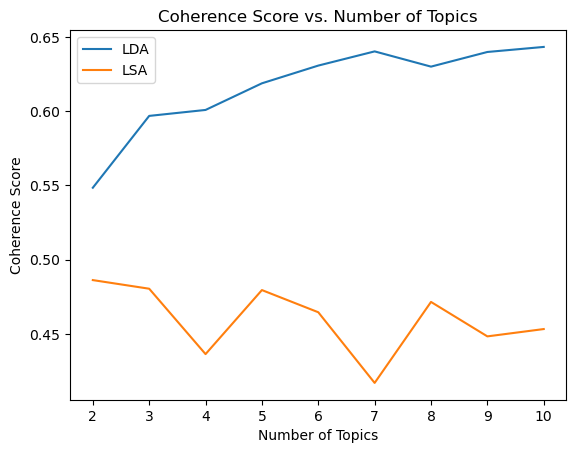

In [21]:
num_topics_range = range(2, 11)  
coherencescore(sampleneg, num_topics_range)

Number of Topics: 2
LDA Coherence Score: 0.5947109912219684
LSA Coherence Score: 0.5170597987788728
------------------------
Number of Topics: 3
LDA Coherence Score: 0.6216679844247056
LSA Coherence Score: 0.4527150661058787
------------------------
Number of Topics: 4
LDA Coherence Score: 0.6395642595730398
LSA Coherence Score: 0.4295451221945013
------------------------
Number of Topics: 5
LDA Coherence Score: 0.6435852087234107
LSA Coherence Score: 0.4979163136088989
------------------------
Number of Topics: 6
LDA Coherence Score: 0.6383218384196764
LSA Coherence Score: 0.4408172044121555
------------------------
Number of Topics: 7
LDA Coherence Score: 0.6350110339039708
LSA Coherence Score: 0.4897684983461093
------------------------
Number of Topics: 8
LDA Coherence Score: 0.6491452106741332
LSA Coherence Score: 0.4616257935913891
------------------------
Number of Topics: 9
LDA Coherence Score: 0.6277117418243556
LSA Coherence Score: 0.4803213104953451
------------------------


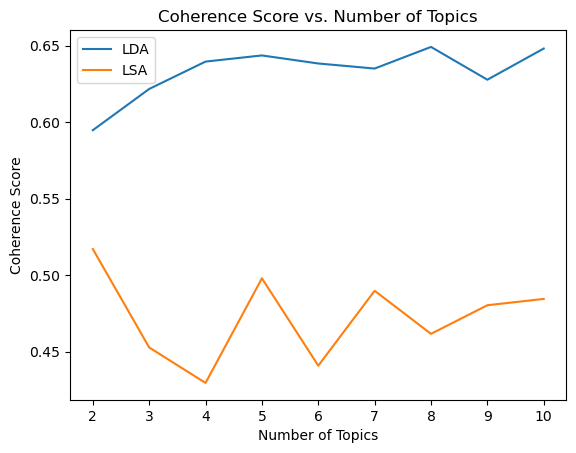

In [22]:
coherencescore(samplepos, num_topics_range)

In [27]:
Latent_Semantic_Analysis(sampleneg, 5)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 490 samples in 0.000s...
[t-SNE] Computed neighbors for 490 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 490 / 490
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.770660
[t-SNE] KL divergence after 1200 iterations: 0.323837


In [28]:
Latent_Semantic_Analysis(samplepos, 5)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 490 samples in 0.000s...
[t-SNE] Computed neighbors for 490 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 490 / 490
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.807617
[t-SNE] KL divergence after 1000 iterations: 0.293301


In [29]:
Latent_Dirichlet_Allocation(sampleneg, 7)

In [30]:
Latent_Dirichlet_Allocation(samplepos, 8)